# Анализ бизнес показателей

# Введение

В данном проекте будут изучены данные пользователей развлекательного приложения Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года. Необходимо выяснить из каких стран и на каких устройствах пользователи заходят в приложение. Какие расходы были потрачены на рекламу за изучаемый период. Какие рекламные каналы сколько требуют затрат. Будет изучена эффективность каждого источника пользователей. Необходимо изучить основные показатели маркетинга: конверсия, удержание, LTV, ROI и CAC.

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Загрузка данных и подготовка их к анализу](#setup)
    * [Предобработка данных таблицы visits](#setup1)
    * [Предобработка данных таблицы orders](#setup2)
    * [Предобработка данных таблицы costs](#setup3)
* [Функции](#functions)
    * [Функция для создания профилей get_profiles()](#functions1)
    * [Функция для расчета удержания get_retention()](#functions2)
    * [Функция для расчета конверсии get_conversion()](#functions3)
    * [Функция для расчета LTV и ROI](#functions4)
    * [Функция для сглаживания фрейма filter_data()](#functions5)
    * [Функция для визуализации удержания plot_retention()](#functions6)
    * [Функция для визуализации конверсии plot_conversion()](#functions7)
    * [Функция для визуализации LTV и ROI plot_ltv_roi()](#functions8)
* [Исследовательский анализ данных](#develop_data)
    * [Создание профилей](#develop_data1)
    * [Определение платящих пользователей по странам](#develop_data2)
* [Маркетинг](#marketing)
* [Оценка окупаемости рекламы](#pay-back)
    * [Анализ окупаемости рекламы](#pay-back1)
    * [Анализ графиков конверсии и рекламы с разбивкой по устройствам](#pay-back2)
    * [Анализ графиков конверсии и рекламы с разбивкой по странам](#pay-back3)
    * [Анализ графиков конверсии и рекламы с разбивкой по рекламным каналам](#pay-back4)
    * [Окупаемость рекламы с разбивкой по устройствам](#pay-back5)
    * [Окупаемость рекламы с разбивкой по странам](#pay-back6)
    * [Окупаемость рекламы с разбивкой по рекламным каналам](#pay-back7)
* [Заключение](#vivod)

<a id="setup"></a>
## Загрузка данных и подготовка их к анализу

Импорт необходимых для работы библиотек:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('D:/Datasets/5. Анализ бизнес показателей/visits_info_short.csv')
orders = pd.read_csv('D:/Datasets/5. Анализ бизнес показателей/orders_info_short.csv')
costs = pd.read_csv('D:/Datasets/5. Анализ бизнес показателей/costs_info_short.csv')

<a id="setup1"></a>
### Предобработка данных таблицы visits

In [3]:
visits.sample(10)

User Id         Region   Device       Channel  \
31236   548142675589  United States      Mac       organic   
157848  334778170901  United States      Mac       organic   
86695   436647574063  United States   iPhone       organic   
57442   928848100343  United States   iPhone  MediaTornado   
62638   857864290853  United States  Android      FaceBoom   
3038    831275045774  United States      Mac       organic   
143320   13453586496  United States  Android       organic   
97978   685337195515  United States   iPhone        TipTop   
101909  721468649600  United States   iPhone        TipTop   
69666   427613618767  United States       PC       organic   

              Session Start          Session End  
31236   2019-06-01 15:04:43  2019-06-01 15:33:21  
157848  2019-09-24 22:37:50  2019-09-24 22:48:41  
86695   2019-07-26 02:28:37  2019-07-26 02:39:33  
57442   2019-06-28 01:59:03  2019-06-28 02:05:59  
62638   2019-07-02 23:29:03  2019-07-03 00:28:21  
3038    2019-05-05 10:35:59  2019-05-05 10:56:56  
143320  2019-09-13 23:20:57  2019-09-14 00:42:38  
97978   2019-08-05 04:55:29  2019-08-05 05:16:49  
101909  2019-08-09 16:16:52  2019-08-09 16:46:16  
69666   2019-07-08 03:15:10  2019-07-08 03:18:26

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [6]:
# переименуем столбцы
visits = visits.rename(columns={
    'User Id': 'user_id', 
    'Region': 'region', 
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
})

Как мы видим пропущенные значения отсутствуют. Столбцы названы некорректно, необходимо переименовать. Так же требуется изменить тип данных столбцов с датами на datetime.

In [7]:
# проверяем на полные дубликаты
visits.duplicated().sum()

0

In [8]:
# проверяем на неявные дубликаты
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [9]:
# проверяем на неявные дубликаты
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [10]:
# проверяем на неявные дубликаты
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [11]:
# меняем тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [13]:
visits.sample(10)

user_id         region   device         channel  \
7622    113542767120  United States      Mac         organic   
215503  680747142327        Germany   iPhone         organic   
207958  836072391411        Germany   iPhone         organic   
45846   601306484353  United States      Mac        FaceBoom   
103921  774625291300  United States   iPhone         organic   
135763  149169745747  United States  Android        FaceBoom   
288164  294070761911        Germany       PC  WahooNetBanner   
227957  461918966057         France       PC  WahooNetBanner   
146433  526805770609  United States       PC  RocketSuperAds   
283297  400111233502             UK  Android  WahooNetBanner   

             session_start         session_end  
7622   2019-05-09 03:59:45 2019-05-09 06:06:32  
215503 2019-05-18 00:31:39 2019-05-18 00:36:53  
207958 2019-05-02 19:08:43 2019-05-02 19:20:16  
45846  2019-06-18 17:41:55 2019-06-18 18:10:04  
103921 2019-08-10 15:53:02 2019-08-10 17:00:20  
135763 2019-09-06 11:19:04 2019-09-06 11:29:14  
288164 2019-09-27 17:04:40 2019-09-27 17:26:22  
227957 2019-06-11 03:37:08 2019-06-11 03:55:28  
146433 2019-09-16 15:34:23 2019-09-16 15:47:13  
283297 2019-09-21 01:21:26 2019-09-21 01:26:09

Предобработка данных таблицы **visits** завершена.

<a id="setup2"></a>
### Предобработка данных таблицы orders

In [14]:
orders.sample(10)

User Id             Event Dt  Revenue
26477  415987618974  2019-10-24 23:32:18     4.99
10768  243180105381  2019-08-04 20:42:51     4.99
35313  658570299809  2019-09-10 07:38:06     4.99
10087  576185604212  2019-07-30 02:20:35     4.99
10057  760502629982  2019-07-30 13:45:23     4.99
35667  963178537932  2019-09-15 18:19:06     4.99
19156  270850738060  2019-09-21 18:31:01     4.99
38845  446287801004  2019-10-18 06:37:16     4.99
19845  794740431622  2019-09-24 10:59:27     4.99
38488  822504414948  2019-10-14 02:26:12     4.99

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Как мы видим пропущенные значения отсутствуют. Столбцы названы некорректно, необходимо переименовать. Так же требуется изменить тип данных столбцов с датами на datetime.

In [16]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [17]:
# переименуем столбцы
orders = orders.rename(columns={
    'User Id': 'user_id', 
    'Event Dt': 'event_dt', 
    'Revenue': 'revenue'
})

In [18]:
# проверяем на полные дубликаты
orders.duplicated().sum()

0

In [19]:
# меняем тип данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Предобработка данных таблицы **orders** завершена.

<a id="setup3"></a>
### Предобработка данных таблицы costs

In [21]:
costs.sample(10)

dt         Channel    costs
1028  2019-09-06      AdNonSense   18.900
1505  2019-07-05  WahooNetBanner   34.800
676   2019-09-14          TipTop  472.500
672   2019-09-10          TipTop  311.500
514   2019-10-02  RocketSuperAds    7.800
1054  2019-10-02      AdNonSense   17.850
1568  2019-09-06  WahooNetBanner   30.600
1230  2019-09-28         LeapBob   15.540
512   2019-09-30  RocketSuperAds    9.425
333   2019-10-01    MediaTornado    6.000

In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Как мы видим пропущенные значения отсутствуют. Столбцы названы некорректно, необходимо переименовать. Изменим тип данных столбца **dt** с датами на datetime.

In [23]:
# переименуем столбцы
costs = costs.rename(columns={
    'Channel': 'channel'
})

In [24]:
# проверяем на дубликаты
costs.duplicated().sum()

0

In [25]:
# меняем тип данных
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Предобработка данных таблицы **costs** завершена.

Вывод: были исправлены наименования колонок для всех таблиц, проверено наличие дубликатов, исправлены типы данных где это требуется.

<a id="functions"></a>
## Функции

<a id="functions1"></a>
### Функция для создания профилей get_profiles()

In [27]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

<a id="functions2"></a>
### Функция для расчета удержания get_retention()

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a id="functions3"></a>
### Функция для расчета конверсии get_conversion()

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a id="functions4"></a>
### Функция для расчета LTV и ROI

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

<a id="functions5"></a>
### Функция для сглаживания фрейма filter_data()

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<a id="functions6"></a>
### Функция для визуализации удержания plot_retention()

In [32]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

<a id="functions7"></a>
### Функция для визуализации конверсии plot_conversion()

In [33]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id="functions8"></a>
### Функция для визуализации LTV и ROI plot_ltv_roi()

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id="develop_data"></a>
## Исследовательский анализ данных

<a id="develop_data1"></a>
### Создание профилей

In [35]:
#создаем профили пользователей 
profiles = get_profiles(visits, orders, costs)
profiles.sample(10)

user_id            first_ts         channel   device  \
46605   308822580677 2019-07-30 02:28:02        FaceBoom   iPhone   
205       1322135377 2019-07-20 06:52:26  WahooNetBanner   iPhone   
138200  921543017561 2019-08-31 10:55:50        FaceBoom   iPhone   
55259   367206793307 2019-09-27 17:20:38          TipTop   iPhone   
267       1728751188 2019-08-17 03:59:15          TipTop  Android   
90358   601133387328 2019-09-03 16:43:34         organic       PC   
67821   450097050349 2019-08-17 20:58:33        FaceBoom   iPhone   
5469     36596810536 2019-08-25 17:41:12  WahooNetBanner  Android   
114933  765944167580 2019-09-27 04:18:53        FaceBoom   iPhone   
94485   629026327527 2019-05-21 06:18:21  WahooNetBanner      Mac   

               region          dt    month  payer  acquisition_cost  
46605   United States  2019-07-30  2019-07  False          1.114667  
205            France  2019-07-20  2019-07  False          0.635294  
138200  United States  2019-08-31  2019-08  False          1.094211  
55259   United States  2019-09-27  2019-09  False          3.459770  
267     United States  2019-08-17  2019-08  False          2.977444  
90358          France  2019-09-03  2019-09  False          0.000000  
67821   United States  2019-08-17  2019-08  False          1.095436  
5469          Germany  2019-08-25  2019-08  False          0.600000  
114933  United States  2019-09-27  2019-09  False          1.116667  
94485              UK  2019-05-21  2019-05  False          0.469565

In [36]:
#определим максимальную и минимальную дату привелечения пользователей 
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователя:', min_date)
print('Максимальная дата привлечения пользователя:', max_date)

Минимальная дата привлечения пользователя: 2019-05-01
Максимальная дата привлечения пользователя: 2019-10-27


Минимальная дата привлечения пользователя: 1 мая 2019 г.

Максимальная дата привлечения пользователя: 27 октября 2019 г.

Эти даты совпадают с периодом указанном в задании.

<a id="develop_data2"></a>
### Определение платящих пользователей по странам

In [37]:
users_from_country = (
    profiles.query('payer == True')
    .groupby('region')
    .agg({'payer': 'count'})
    .sort_values('payer',ascending = False)
)
users_from_country['percent'] = round(users_from_country['payer'] / users_from_country['payer'].sum() * 100)
users_from_country

payer  percent
region                       
United States   6902     78.0
UK               700      8.0
France           663      7.0
Germany          616      7.0

Вывод: больше всего платящих пользователей находится в США, 78% от общего числа платящих пользователей. Из стран Европы количество платящих пользователей примерно одинаковое.

In [38]:
users_from_country = (
    profiles.groupby('region')
    .agg({'user_id': 'count'})
    .sort_values('user_id',ascending = False)
)
users_from_country['all_users_percent'] = round(users_from_country['user_id'] / users_from_country['user_id'].sum() * 100)
users_from_country['payers'] = profiles.query('payer == True').groupby('region')['user_id'].count()
users_from_country['payers_percent'] = round(users_from_country['payers'] / users_from_country['user_id'].sum() * 100, 2)
users_from_country

user_id  all_users_percent  payers  payers_percent
region                                                           
United States   100002               67.0    6902            4.60
UK               17575               12.0     700            0.47
France           17450               12.0     663            0.44
Germany          14981               10.0     616            0.41

Вывод: наибольшее число платящих пользователей из США - 6,53 %. Доля платящих пользователей из стран Европы одинаковая.

In [39]:
users_from_country = (
    profiles.groupby('region')
    .agg({'user_id': 'count'})
    .sort_values('user_id',ascending = False)
)
users_from_country['all_users_percent'] = round(users_from_country['user_id'] / users_from_country['user_id'].sum() * 100)
users_from_country['payers'] = profiles.query('payer == True').groupby('region')['user_id'].count()
users_from_country['payers_percent'] = round(users_from_country['payers'] / users_from_country['user_id'] * 100, 2)
users_from_country

user_id  all_users_percent  payers  payers_percent
region                                                           
United States   100002               67.0    6902            6.90
UK               17575               12.0     700            3.98
France           17450               12.0     663            3.80
Germany          14981               10.0     616            4.11

In [40]:
users_by_device = (
    profiles.groupby('device')
    .agg({'user_id': 'count'})
)
users_by_device['all_users_percent'] = round(users_by_device['user_id'] / users_by_device['user_id'].sum() * 100)
users_by_device['payers'] = profiles.query('payer == True').groupby('device')['user_id'].count()
users_by_device['payers_percent'] = round(users_by_device['payers'] / users_by_device['user_id'] * 100, 2)
users_by_device.sort_values('user_id',ascending = False)

user_id  all_users_percent  payers  payers_percent
device                                                     
iPhone     54479               36.0    3382            6.21
Android    35032               23.0    2050            5.85
PC         30455               20.0    1537            5.05
Mac        30042               20.0    1912            6.36

Вывод: посчитана доля платящих пользователей по устройствам.

In [41]:
users_by_channel = (
    profiles.groupby('channel')
    .agg({'user_id': 'count'})
)
users_by_channel['all_users_percent'] = round(users_by_channel['user_id'] / users_by_channel['user_id'].sum() * 100)
users_by_channel['payers'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
users_by_channel['payers_percent'] = round(users_by_channel['payers'] / users_by_channel['user_id'] * 100, 2)
users_by_channel.sort_values('payers',ascending = False)

user_id  all_users_percent  payers  payers_percent
channel                                                               
FaceBoom              29144               19.0    3557           12.20
TipTop                19561               13.0    1878            9.60
organic               56439               38.0    1160            2.06
WahooNetBanner         8553                6.0     453            5.30
AdNonSense             3880                3.0     440           11.34
RocketSuperAds         4448                3.0     352            7.91
LeapBob                8553                6.0     262            3.06
OppleCreativeMedia     8605                6.0     233            2.71
lambdaMediaAds         2149                1.0     225           10.47
YRabbit                4312                3.0     165            3.83
MediaTornado           4364                3.0     156            3.57

Вывод: 52% пользователей приходят из каналов FaceBoom и TipTop.

<a id="marketing"></a>
## Маркетинг

In [42]:
# сколько денег потратили на маркетинг
total_costs = round(costs['costs'].sum())
print('Общие затраты на рекламу:', total_costs)

Общие затраты на рекламу: 105497


In [43]:
#сколько денег потратили в зависимости от канала
channel_costs = (
    costs.groupby('channel')
    .agg ({'costs': 'sum'})
    .sort_values('costs', ascending = False)
)
channel_costs['percent'] = round(channel_costs['costs'] / channel_costs['costs'].sum() * 100)
channel_costs

costs  percent
channel                              
TipTop              54751.30     52.0
FaceBoom            32445.60     31.0
WahooNetBanner       5151.00      5.0
AdNonSense           3911.25      4.0
OppleCreativeMedia   2151.25      2.0
RocketSuperAds       1833.00      2.0
LeapBob              1797.60      2.0
lambdaMediaAds       1557.60      1.0
MediaTornado          954.48      1.0
YRabbit               944.22      1.0

В канале TipTop потратили больше всего денег на рекламу. Хотя по привлечению клиентов он на втором месте.

In [44]:
# сколько было потрачено на рекламу в каждую неделю анализируемого периода
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_week'] = costs['dt'].dt.isocalendar().week

total_week_history = (
    costs.groupby('costs_week')
    .agg ({'costs': 'sum'})
    .sort_values('costs_week')
)
total_week_history.head(5)

costs
costs_week          
18          1455.640
19          2031.820
20          1976.320
21          2297.120
22          3427.075

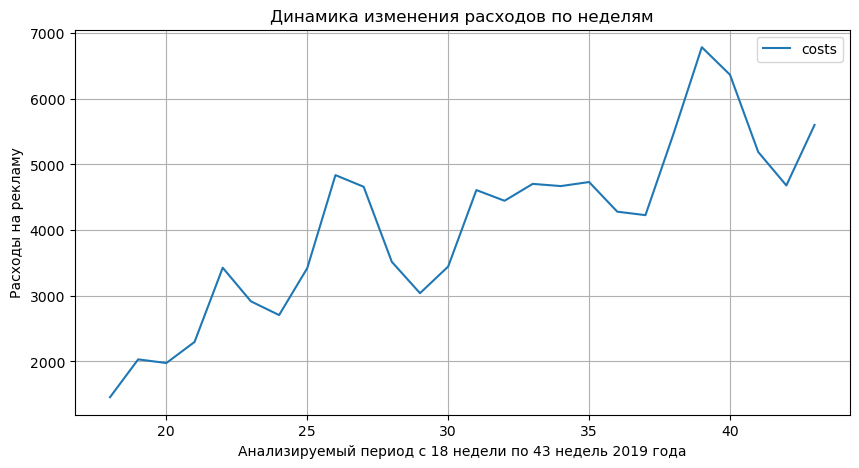

In [45]:
total_week_history.plot(grid=True, figsize=(10, 5))
plt.title('Динамика изменения расходов по неделям')
plt.ylabel('Расходы на рекламу')
plt.xlabel('Анализируемый период с 18 недели по 43 недель 2019 года')
plt.show()

In [46]:
# сколько было потрачено на рекламу в каждом месяце анализируемого периода
costs['costs_month'] = costs['dt'].dt.to_period('M')

total_month_history = (
    costs.groupby('costs_month')
    .agg ({'costs': 'sum'})
    .sort_values('costs_month')
)
total_month_history

costs
costs_month           
2019-05       9978.570
2019-06      15090.045
2019-07      16447.060
2019-08      20657.870
2019-09      22441.340
2019-10      20882.415

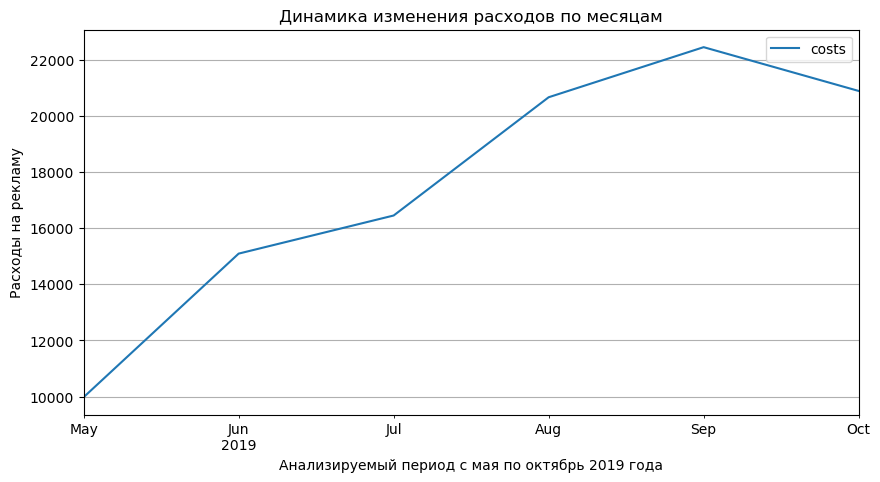

In [47]:
total_month_history.plot(grid=True, figsize=(10, 5))
plt.title('Динамика изменения расходов по месяцам')
plt.ylabel('Расходы на рекламу')
plt.xlabel('Анализируемый период с мая по октябрь 2019 года')
plt.show()

Вывод: из графика видно, что с каждым месяцем расходы на рекламу только росли. Небольшое снижение затрат на рекламу появляется в октябре.

In [48]:
week_history = costs.pivot_table(
        index='costs_week', columns='channel', values='costs', aggfunc='sum'
    )

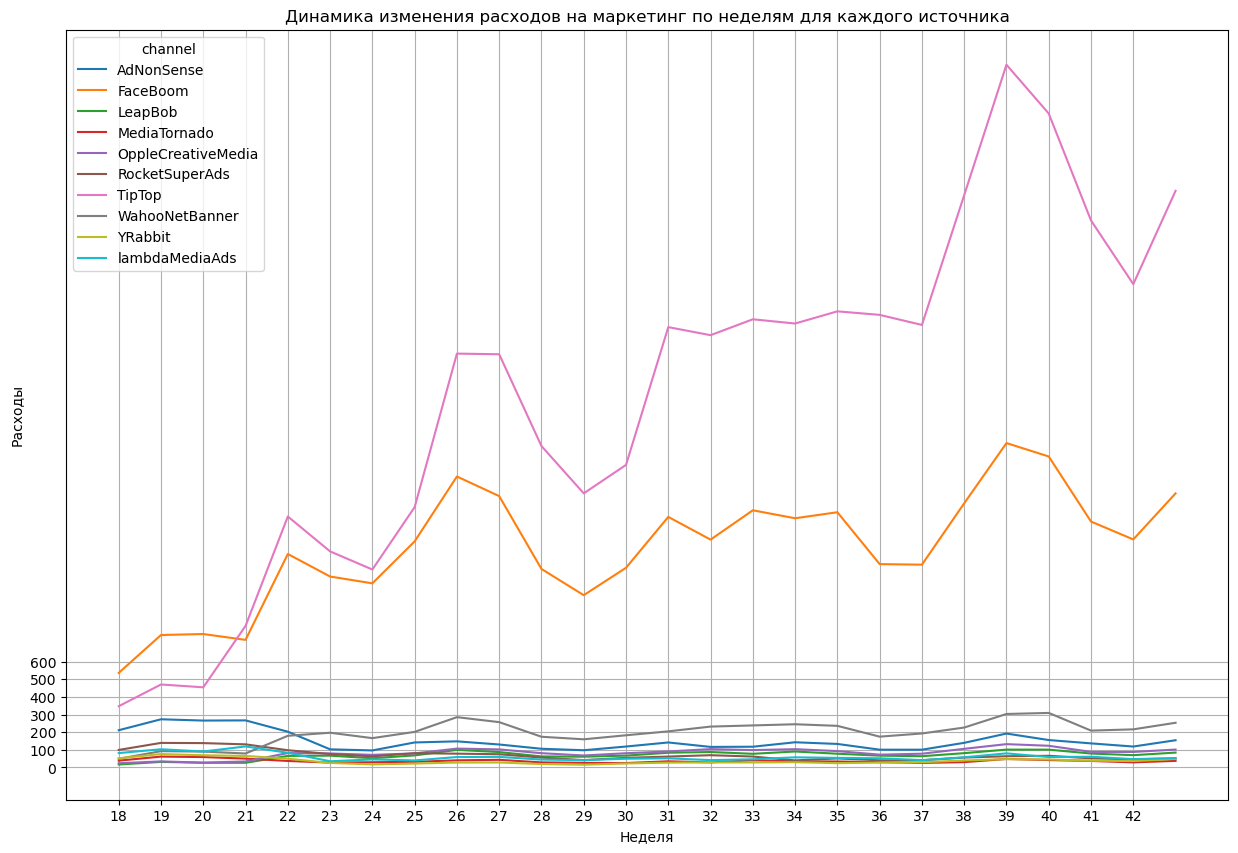

In [49]:
week_history.plot(                                             
           figsize=(15, 10), 
           grid=True,                   
           legend=True
) 

plt.yticks(np.arange(0, 700, 100)) 
plt.xticks(np.arange(18, 43)) 
plt.title('Динамика изменения расходов на маркетинг по неделям для каждого источника')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

In [50]:
month_history = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
month_history

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95     113.3     2.52          6.24                4.25   
2019-05-02       34.65      78.1     2.94          5.04                4.25   
2019-05-03       47.25      85.8     2.73          6.96                5.75   
2019-05-04       51.45     136.4     3.99          9.36                4.25   
2019-05-05       36.75     122.1     4.62         11.04                5.50   
...                ...       ...      ...           ...                 ...   
2019-10-23       15.75     178.2    10.71          5.28               13.25   
2019-10-24       21.00     222.2    12.81          5.04               12.50   
2019-10-25       26.25     255.2    14.70          6.24               16.50   
2019-10-26       21.00     272.8    14.28          6.72               14.25   
2019-10-27       35.70     233.2    12.81          4.56               17.75   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                           
2019-05-01          21.060    80.0            10.8     8.10            17.6  
2019-05-02          16.965    55.0             7.2     9.90            16.8  
2019-05-03          16.380    64.0             8.4     9.00            16.8  
2019-05-04          17.550    70.0            10.8    15.60            17.6  
2019-05-05          27.495    78.0            12.0     9.60            12.8  
...                    ...     ...             ...      ...             ...  
2019-10-23           5.525   322.0            31.8     6.48             4.0  
2019-10-24           5.850   402.5            42.0     7.29             6.4  
2019-10-25           7.150   483.0            37.2     7.56             8.8  
2019-10-26           4.550   563.5            40.8     5.67             8.8  
2019-10-27          10.075   588.0            42.0    11.07            12.0  

[180 rows x 10 columns]

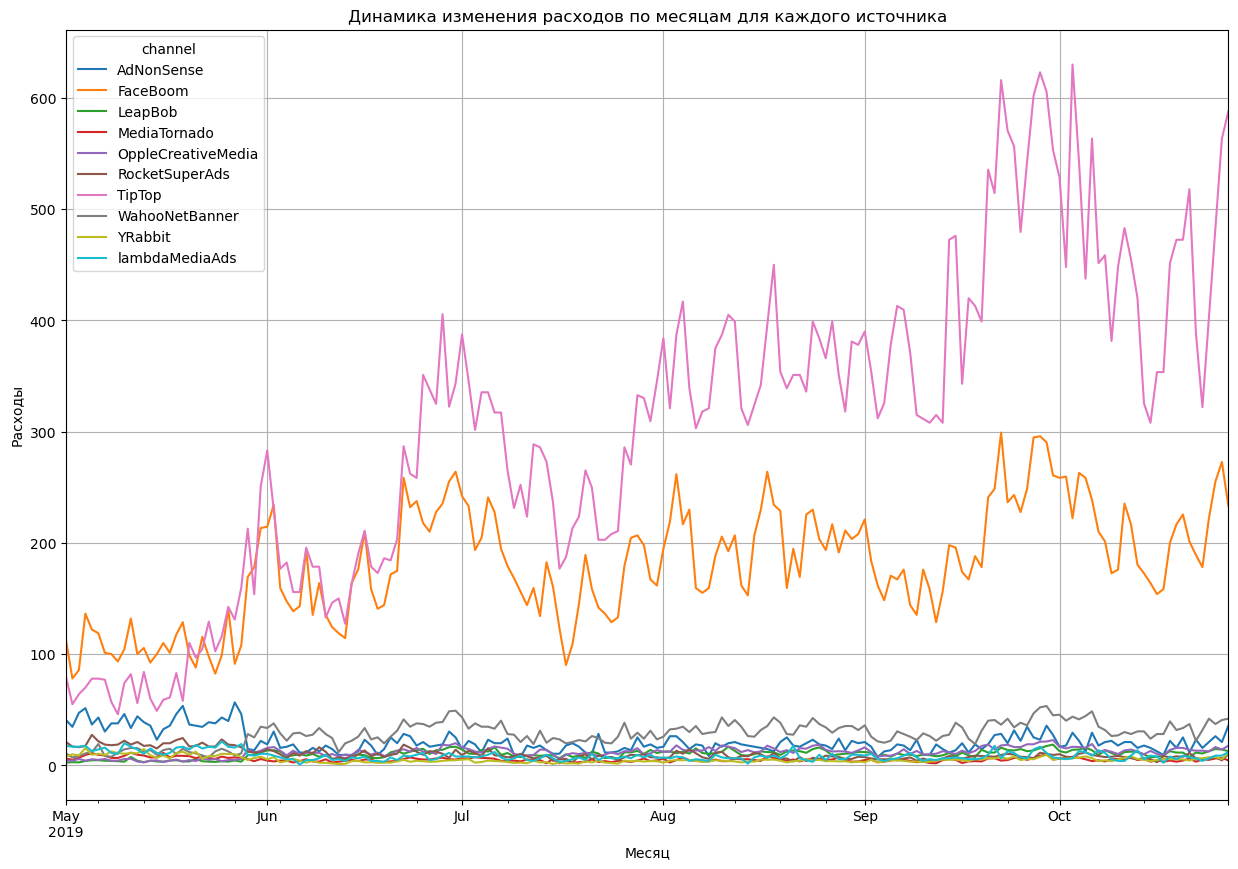

In [51]:
month_history.plot(                                             
           figsize=(15, 10), 
           grid=True,        
           legend=True
) 

plt.yticks(np.arange(0, 700, 100)) 
plt.title('Динамика изменения расходов по месяцам для каждого источника')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

Вывод: из графиков выше видно, что фаворитами по затратам являются каналы FaceBoom и TipTop.

In [52]:
month_history = costs.pivot_table(
        index='costs_month', columns='channel', values='costs', aggfunc='sum'
    )

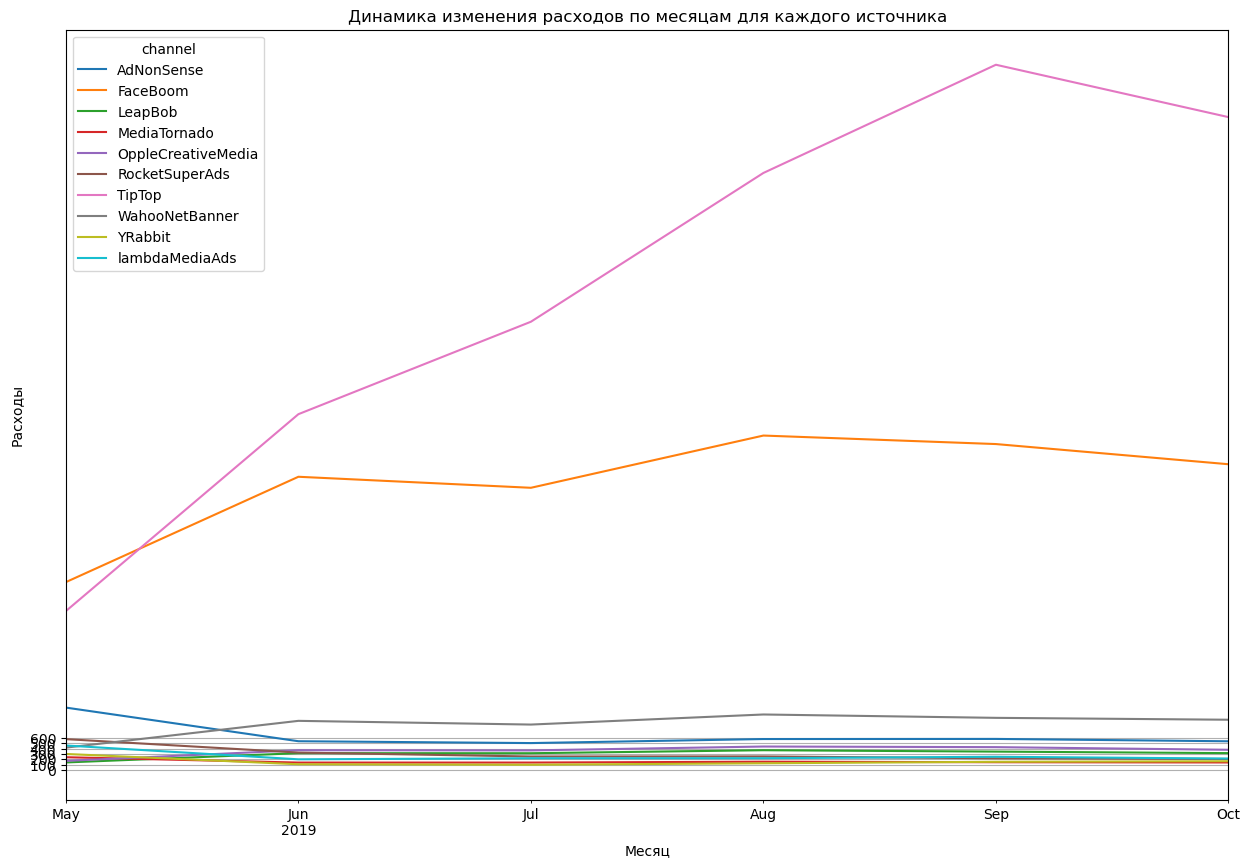

In [53]:
month_history.plot(                                             
           figsize=(15, 10), 
           grid=True,        
           legend=True
) 

plt.yticks(np.arange(0, 700, 100)) 
plt.title('Динамика изменения расходов по месяцам для каждого источника')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

In [54]:
# сколько в среднем стоит привлечение одного пользователя из каждого источника

acquisition_cost = (
    profiles.groupby('channel')
    .agg ({'acquisition_cost': 'mean'})
    .sort_values('acquisition_cost', ascending = False)
)
acquisition_cost

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Вывод: привлеченный платящий пользователь из канала TipTop выходит более чем в 2 раза дороже, чем пользователь из FaceBoom.

Вывод: общие затраты на маркетинг составили 105497 $. При этом львиную долю бюджета 83 % съедают каналы FaceBoom и TipTop.

In [55]:
acquisition_cost_user = (
    profiles.groupby('user_id')
    .agg ({'acquisition_cost': 'mean'})
    .sort_values('acquisition_cost', ascending = False)
)
acquisition_cost_user

acquisition_cost
user_id                       
975864617797          3.715385
658088125802          3.715385
402874163955          3.715385
717904110722          3.715385
73808119380           3.715385
...                        ...
481952876872          0.000000
481939984583          0.000000
481890220519          0.000000
481864823252          0.000000
999999563947          0.000000

[150008 rows x 1 columns]

<a id="pay-back"></a>
## Оценка окупаемости рекламы

<a id="pay-back1"></a>
### Анализ окупаемости рекламы

In [56]:
# задаем момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [57]:
# органических пользователей в анализе не будем учитывать 
profiles = profiles.query('channel !="organic"')

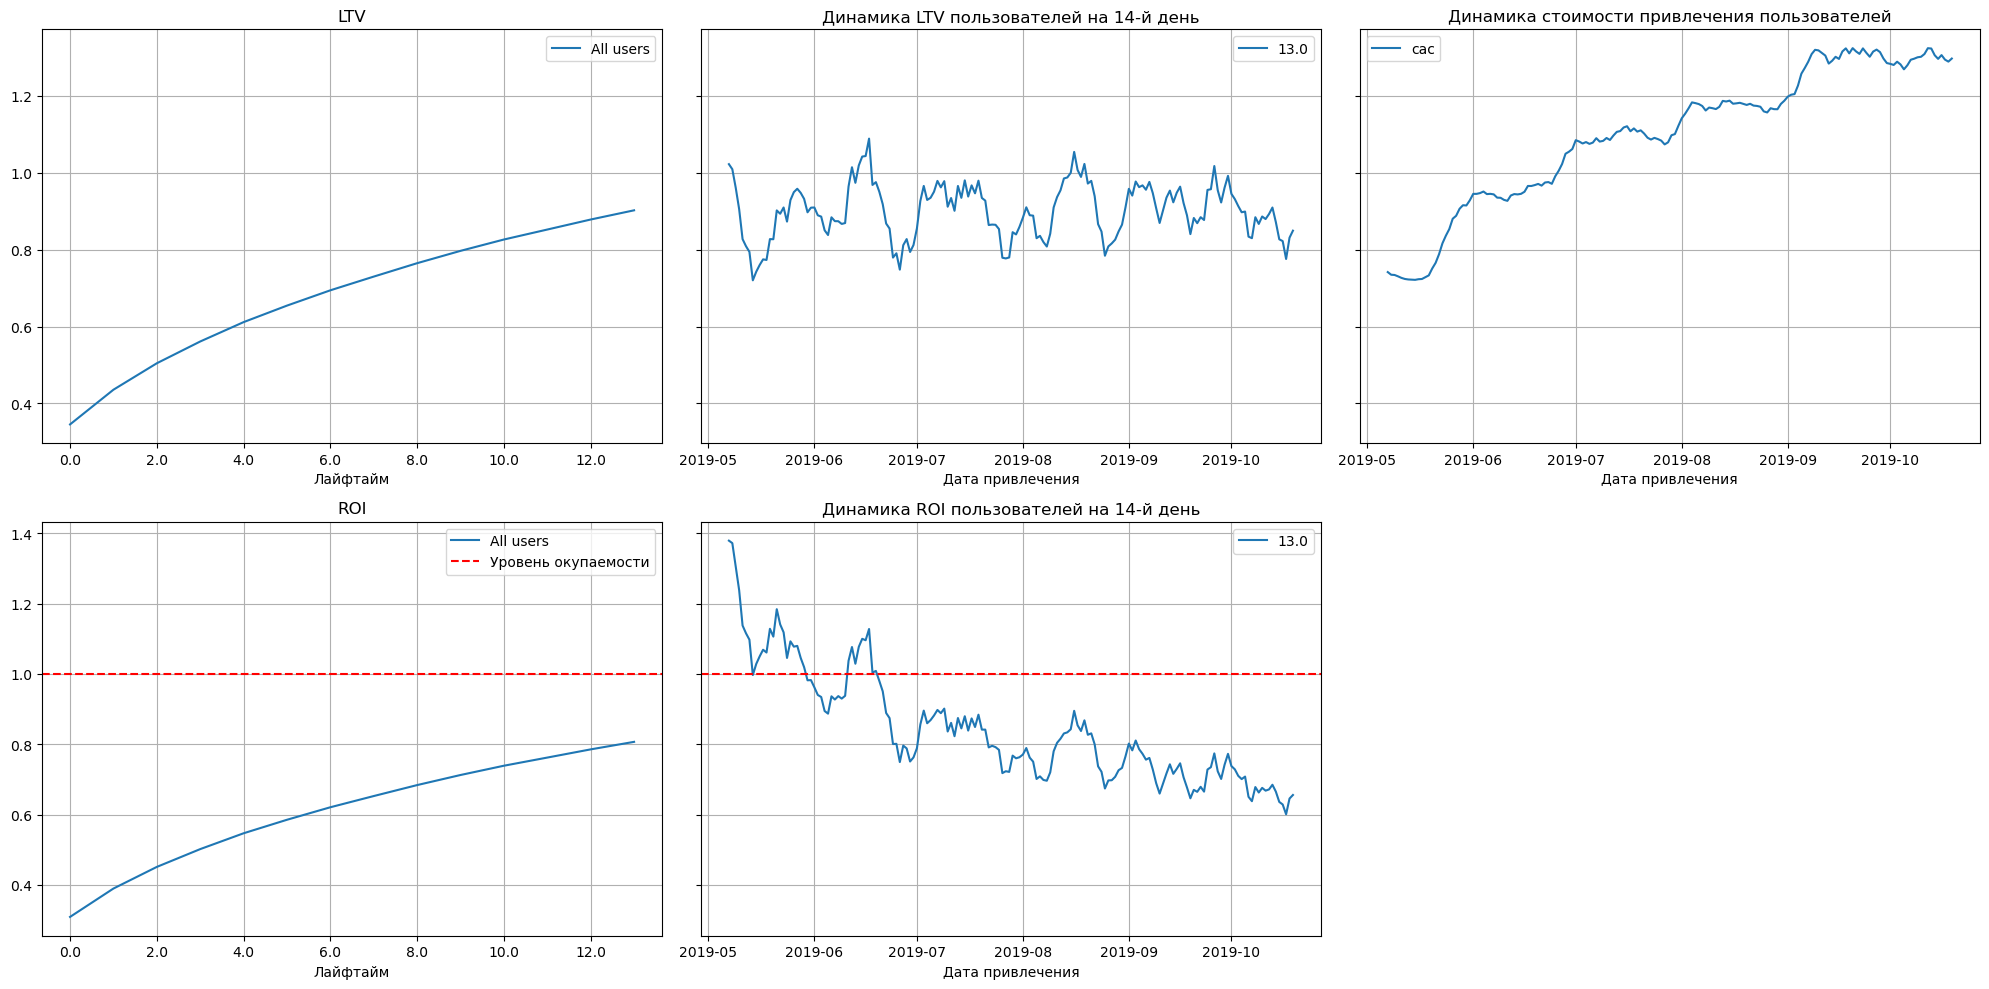

In [58]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Выводы:
 - Один пользователь приложения за 14 в среднем приносит компании со всех своих покупок 0.9.
 
 - График динамики LTV пользователей показывает, что LTV сильно не меняется с течением времени. То есть приложение стабильно приносит доход. В среднем колеблется от 0,8 до 1. По какой-то причине LTV в первой половине каждого месяца растет, а во второй половине месяца падает до значений начала месяца.
 
 - Динамика CAC показывает, то расходы на рекламу растут с каждым месяцем.
 - Реклама не окупается, так как линия уровня окупаемости находится выше линии ROI.
 - На графике динамики ROI видно, что до июня реклама окупалась.

<a id="pay-back2"></a>
### Анализ графиков конверсии и рекламы с разбивкой по устройствам

Анализ конверсии

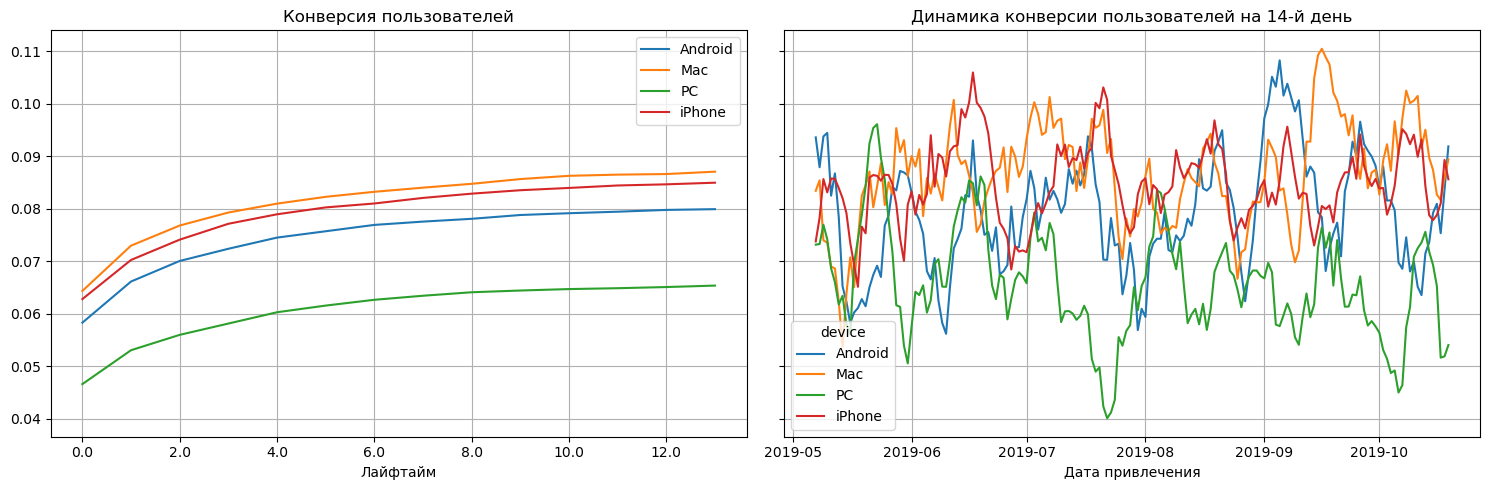

In [59]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Выводы:
 - Пользователи MAC имеют самую высокую конверсию;
 - Пользователи, использующие PC для входа в приложения имеют самую низкую конверсию.

Анализ удержания

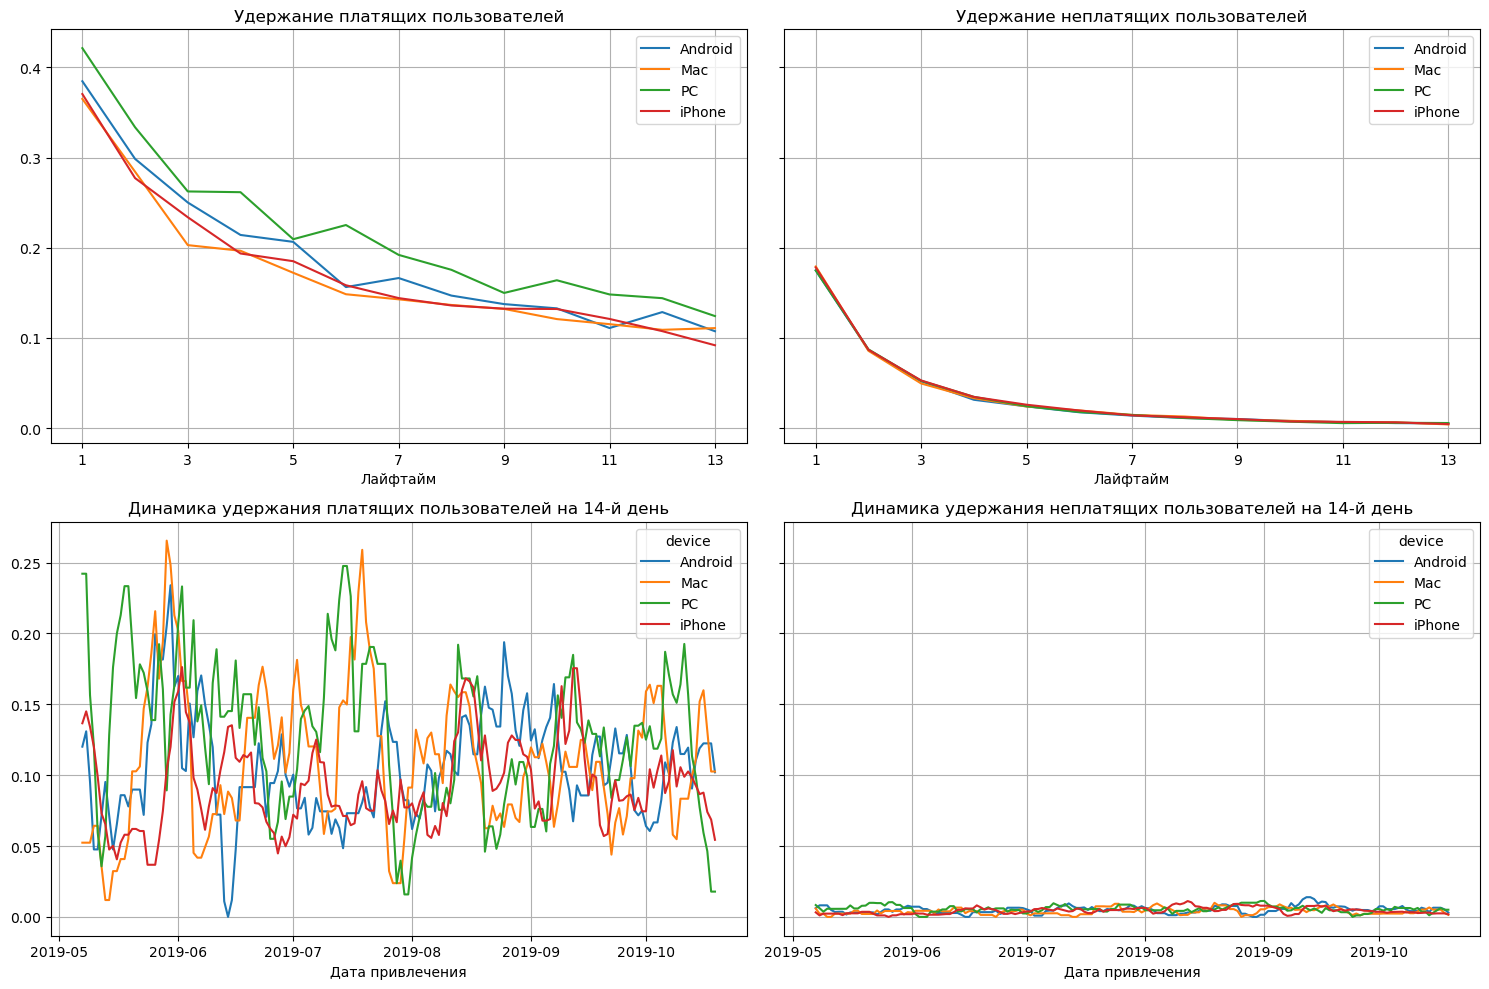

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы: удержание у всех пользователей примерно одинаковое.

<a id="pay-back3"></a>
### Анализ графиков конверсии и рекламы с разбивкой по странам

Анализ конверсии по странам

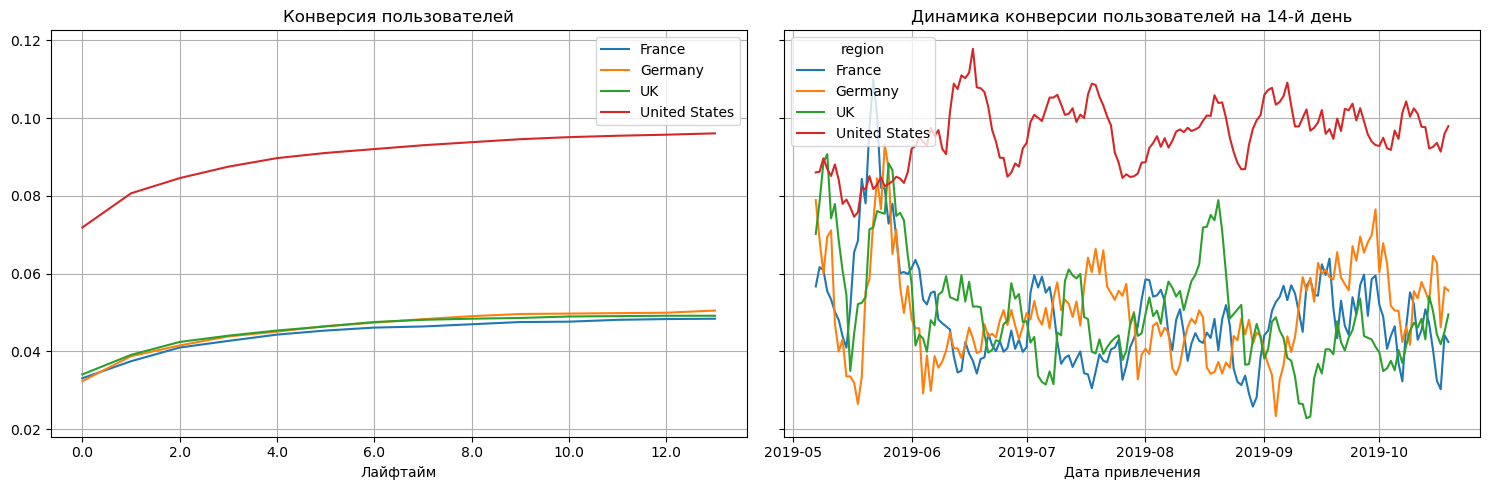

In [61]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод: самая высокая конверсия у пользователей из США.

Анализ удержания по странам

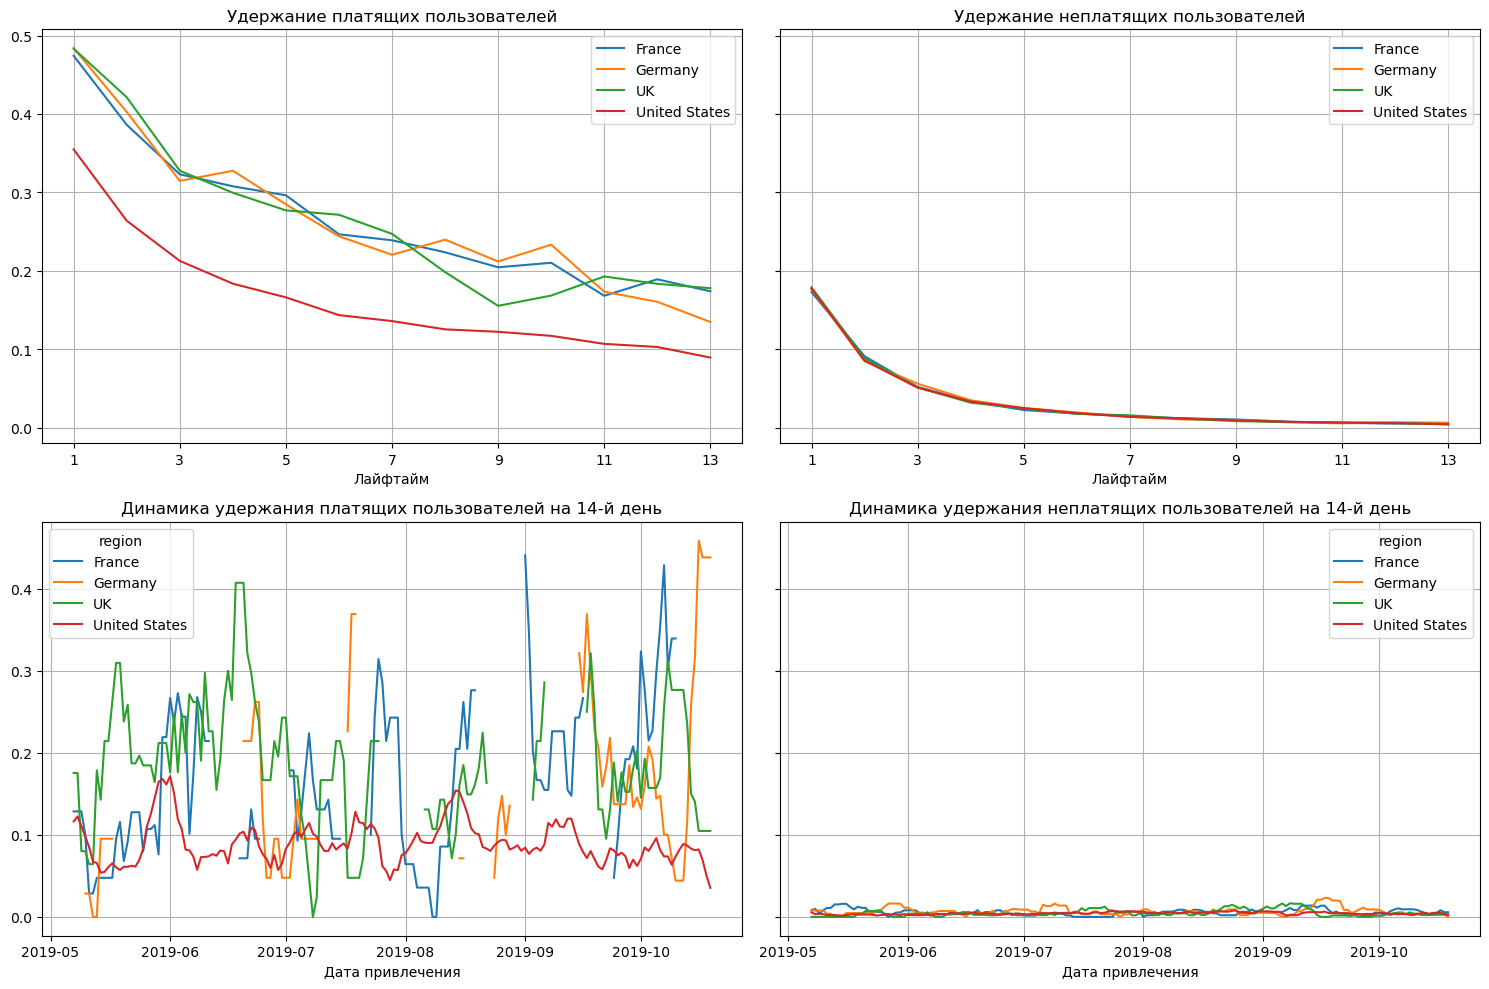

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: но удержание у пользователей из США самое низкое.

<a id="pay-back4"></a>
### Анализ графиков конверсии и рекламы с разбивкой по рекламным каналам

Конверсия по рекламным каналам

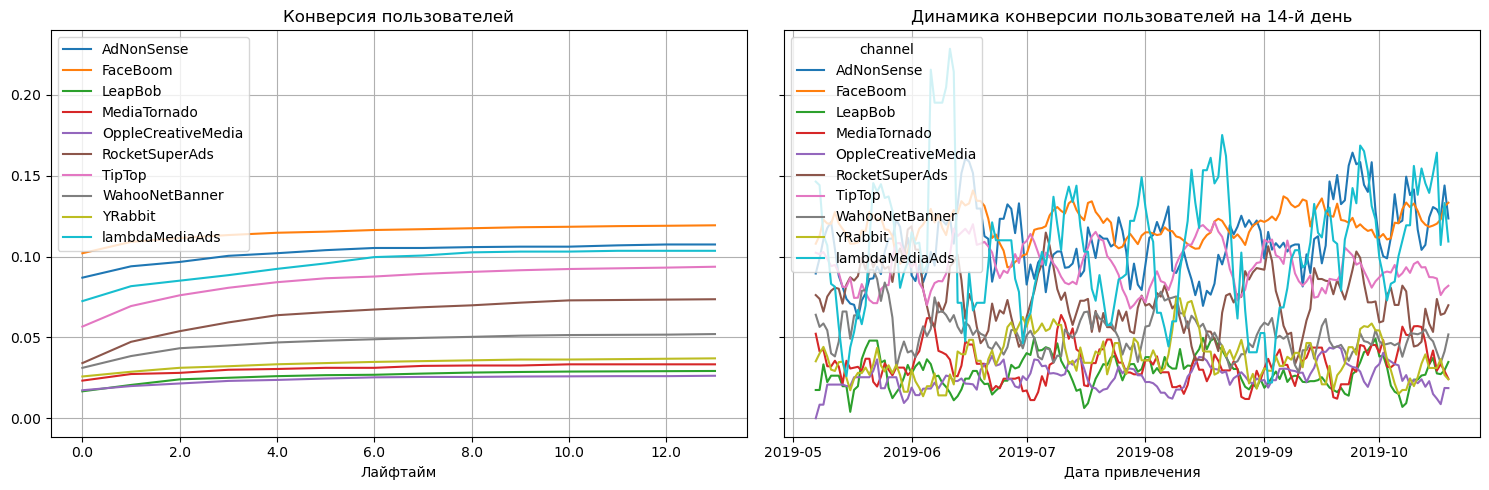

In [63]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод: в топе по конверсии рекламные каналы AdNonSense, FaceBoom и lambdaMediaAds.

Удержание по рекламным каналам

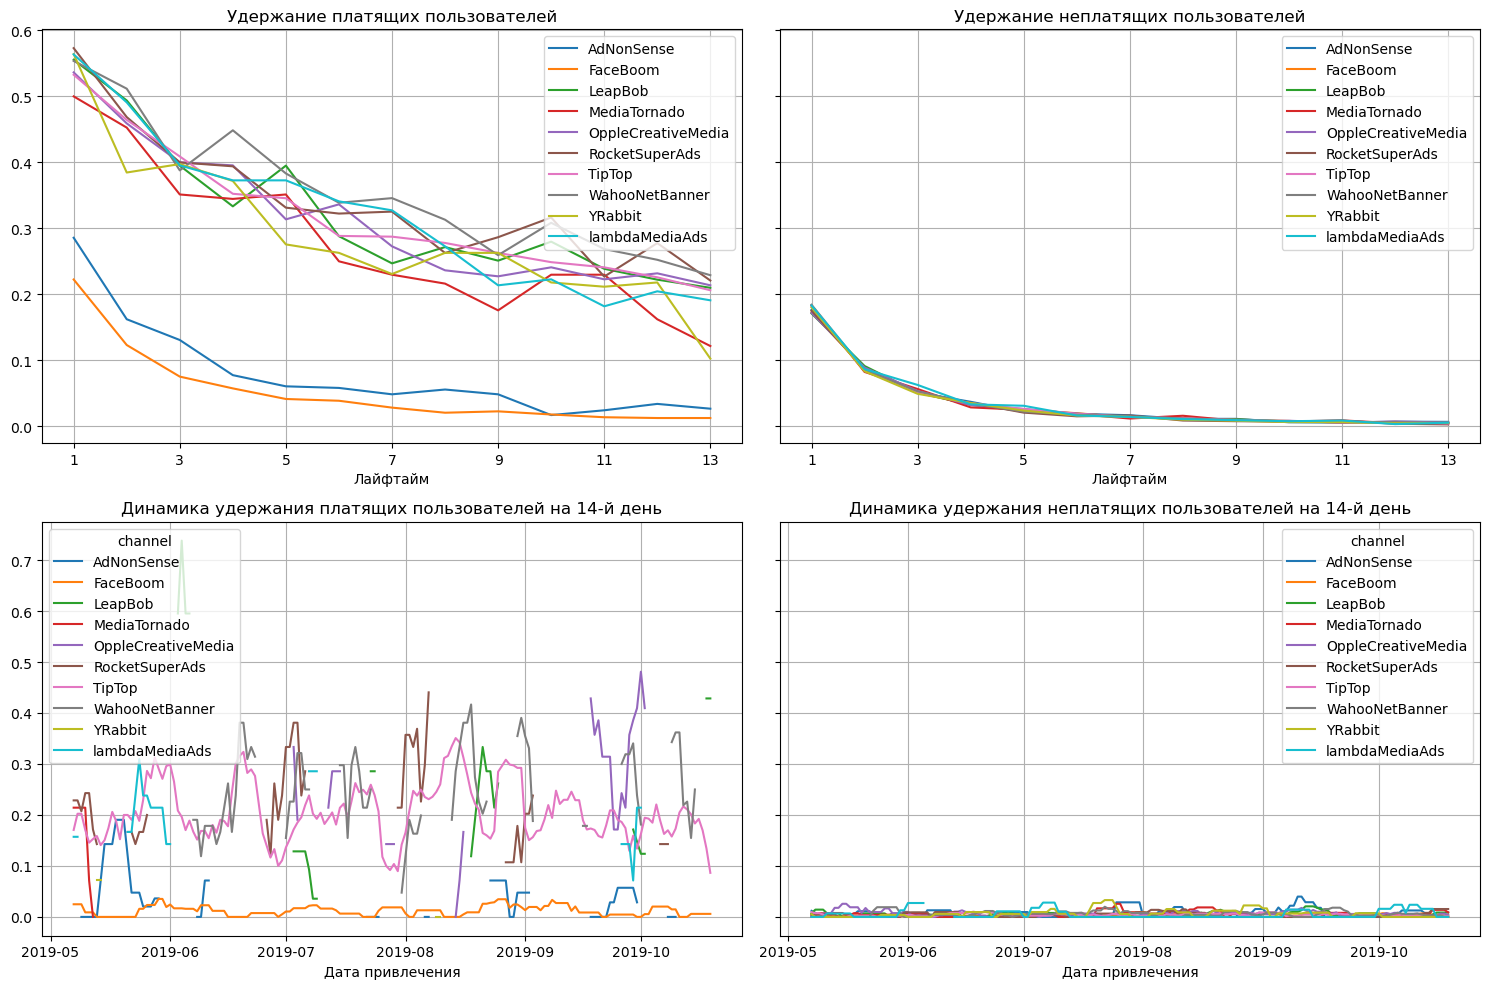

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: плохое удержание показывают каналы AdNonSense и FaceBoom. Значит они не самые эффективные даже с учетом высокой конверсии.

<a id="pay-back5"></a>
### Окупаемость рекламы с разбивкой по устройствам

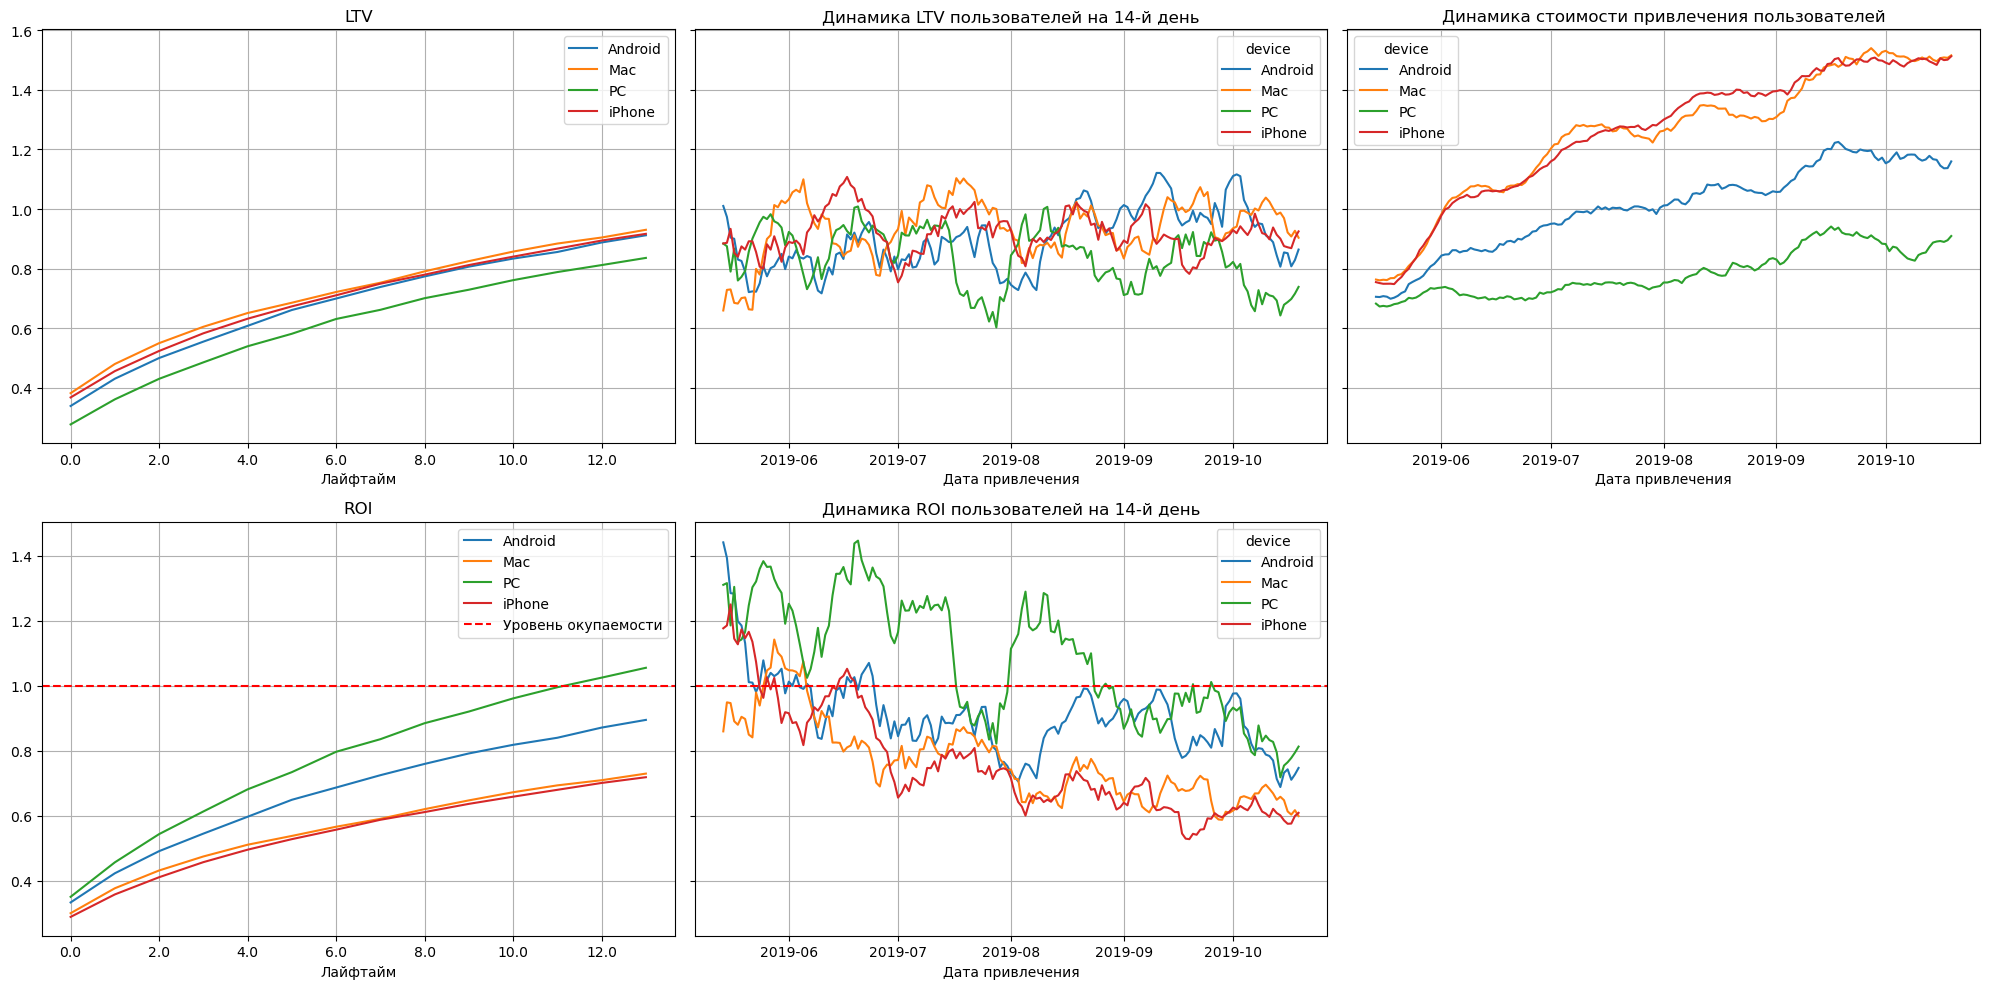

In [65]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы:
 - Меньше всего прибыли приносит пользователи PC, остальные устройства примерно на одном уровне;
 - При этом у пользователей PC самая низкая стоимость привлечения;
 - Из графиков ROI и динамика ROI видно, что окупаются только пользователи PC;
 - Опять же видно, что до июня все пользователи окупались. После июня графики ползут вниз и пользователи перестают окупаться.

<a id="pay-back6"></a>
### Окупаемость рекламы с разбивкой по странам

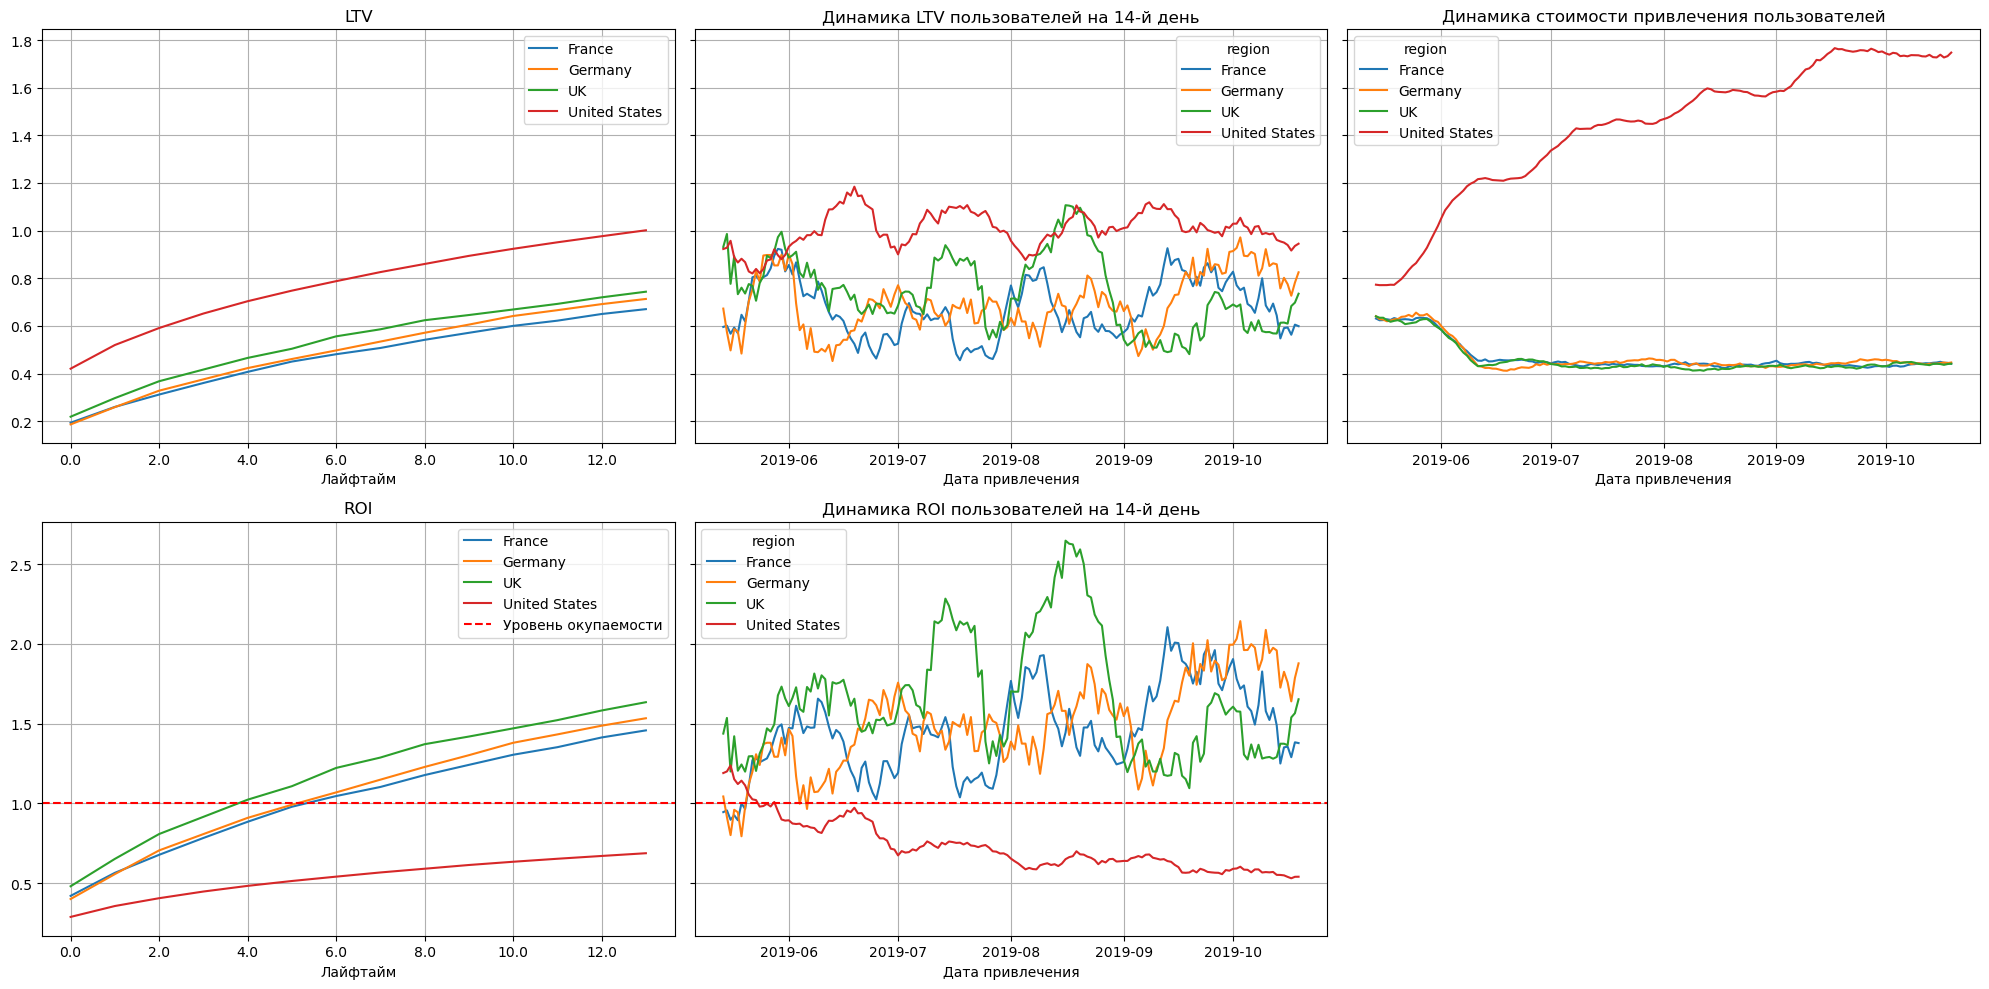

In [66]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы:
 - График LTV по странам показывает, что больше всего прибыли приносят пользователи из США. Пользователи стран Европы приносят примерно одинаково;
 - Но при этом ROI нам говорит о том, что единственные пользователи, которые не окупаются - это пользователи из США;
 - Динамика стоимости привлечения пользователей из США самая большая.

<a id="pay-back7"></a>
### Окупаемость рекламы с разбивкой по рекламным каналам

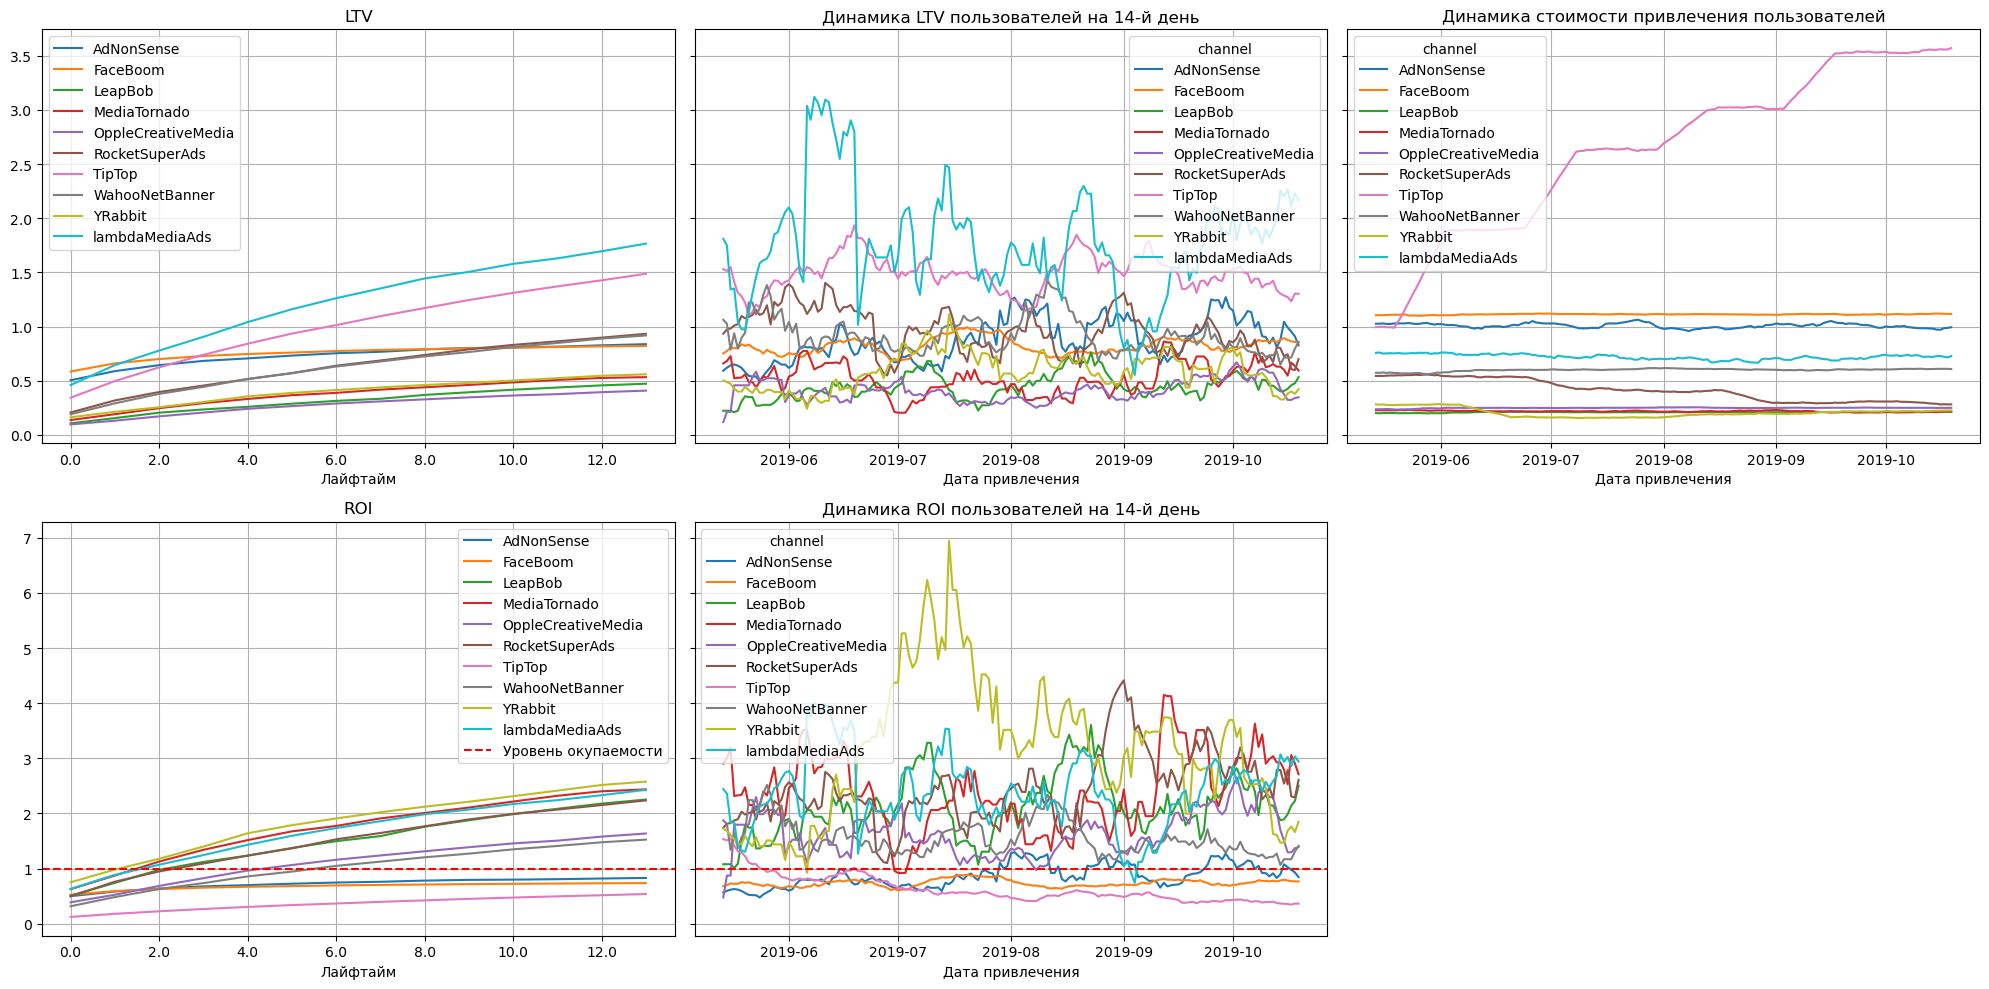

In [67]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Выводы:
 - Не окупаются каналы TipTop, FaceBoom и AdNonSense;
 - Стоимость привлечения клиентов через TipTop стремительно растет начиная с июня.

<a id="vivod"></a>
## Заключение

В результате данного проекта был проведен маркетинговый анализ развлекательного приложения Procrastinate Pro+ в период с 1 мая по 27 октября 2019 года.

**Предобработка данных:**
 - переименованы столбцы для удобства работы;
 - изменен тип данных, где это требуется;
 - выполнен поиск дубликатов.

**Исследовательский анализ данных:**
 - составлены профили пользователей;
 - минимальная дата привлечения пользователей: 01.05.2019;
 - максимальная дата привлечения пользователей: 27.10.2019;
 - максимальное число пользователей из США: почти 80%;
 - соответственно наибольшая доля пользователей пользуется MAC и iPhone: в сумме 70%.

**Маркетинг:**
 - Затраты на каналы FaceBoom и TipTop в сумме составляют 81% от всего бюджета;
 - Очень дорого стоят пользователи, привлеченные через канал TipTop.

**Оценка окупаемости:**

Затраты на  маркетинг не окупаются.
Так как наибольшее число пользователей (почти 80%) из США, самая высокая конверсия в США и на устройствах MAC и iPhone. При этом удержание низкое для всех вышеперечисленных категорий пользовователей. Это свидетельствует о том, что приложение необходимо дорабатывать на MAC и iPhone. Возможно имеется высокое наличие багов, либо плохая техническая поддержка в США. 

Для привлечения платежеспособных пользователей необходимо изменить затраты на рекламу:
 - Уменьшить финансирование каналов AdNonSense, FaceBoom и TipTop, так как они не окупаются;
 - Увеличить финансирование каналов lambdaMediaAds, RocketSuperAds, WahooRedBanner, YRabbit. Так как эти каналы обладают хорошими показателями конверсии, удержания и окупаемости.
 
Необходимо изменить стратегию рекламной компании в США. Там пользователи плохо удерживаются и реклама не окупается в течение 14 дней. Требуется поменять источники привлечения пользователей.

Так как у канала TipTop показатель CAC (стоимость привлечения пользователей) стремительно растет. Необходимо остановить финансирование этого канала. Тем болле он совсем не окупается.

Каналы FaceBoom и AdNonSense не окупаются в связи с высокой стоимость привлечения пользователей и низким удержанием. Другими словами эти каналы приносят приложению недостаточно для окупаемости платящих пользователей.